In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import progressbar
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [87]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from array import array 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [88]:
# import pandas as pd
# import pyodbc 

# conn = pyodbc.connect('Driver={SQL Server};'
#                       'Server=RON\SQLEXPRESS;'
#                       'Database=test_database;'
#                       'Trusted_Connection=yes;')

# df = pd.read_sql_query('SELECT * FROM products', conn)

# print(df)
# print(type(df))

In [89]:
# historical data is imported using YFinance
import yfinance as yf

stock = yf.Ticker("BTC-USD")
hist = stock.history(period="5y")

df=hist

hist.tail(10)
# The ticker is a quick dispatch that tells you the current price of the stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,33676814852,0,0
2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,28479699446,0,0
2021-12-09,50450.082031,50797.164062,47358.351562,47672.121094,29603577251,0,0
2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,30966005122,0,0
2021-12-11,47264.632812,49458.210938,46942.347656,49362.507812,25775869261,0,0
2021-12-12,49354.855469,50724.867188,48725.851562,50098.335938,21939223599,0,0
2021-12-13,50114.742188,50205.000000,45894.847656,46737.480469,32166727776,0,0
2021-12-14,46709.824219,48431.398438,46424.496094,46612.632812,34638619079,0,0
2021-12-15,48379.753906,49473.957031,46671.964844,48896.722656,36541828520,0,0


In [90]:
print('Is there any missing value? ', df.isnull().values.any())
print('How many missing values? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

Is there any missing value?  False
How many missing values?  0
Number of participants after eliminating missing values:  1823


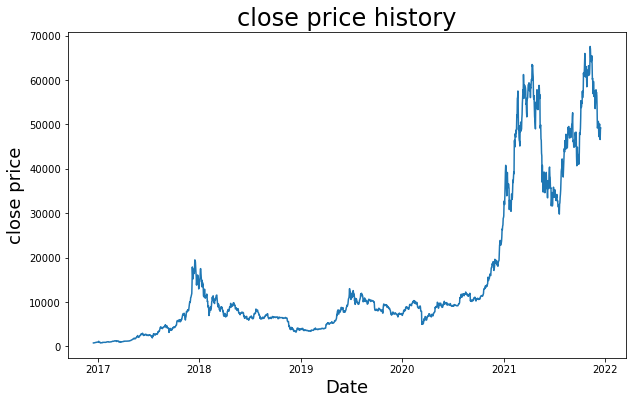

In [91]:
# Visualize the closing price history
plt.figure(figsize=(10,6))
plt.title('close price history',fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.show()

In [92]:
# creation of training and test dataset

d=30                 # number of days yo want to use the prediction dataset to predict future
n=int(hist.shape[0]*0.8)
data = df.filter(['Close'])
dataset = data.values

In [93]:
# dataset is scaled and reshaped
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)
scaled_data

array([[1.07052894e-04],
       [1.95720052e-04],
       [1.91244017e-04],
       ...,
       [6.86263112e-01],
       [7.20461669e-01],
       [7.24867271e-01]])

In [94]:
train_data = scaled_data[0:n,:]

X_train = []
y_train = []
for i in range(d, len(train_data)):
    X_train.append(train_data[i-d:i, 0])
    y_train.append(train_data[i, 0])
    if i<d:
        print(X_train)
        print(y_train)
        print()


In [95]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1428, 30)

In [96]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1428, 30, 1)

In [97]:
#lstm model

model = Sequential()

model.add(LSTM(128,  return_sequences = False ,input_shape = (X_train.shape[1], 1)))
# model.add(Dropout(0.2))

# model.add(LSTM(64,  return_sequences = True ))
# model.add(Dropout(0.2))

# model.add(LSTM(32,  return_sequences = False))
# model.add(Dropout(0.2))

model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history=model.fit(X_train, y_train, epochs = 100, batch_size = 64)

# return_sequences : Whether to return the last output in the output sequence, or the full sequence. 
# epochs is the number of passes of the entire training dataset, more epochs = more accuracy
# batch size is the number of training examples utilized in one iteration
# The input gate: The input gate adds information to the cell state,
# The forget gate: It removes the information that is no longer required by the model,
# The output gate: Output Gate at LSTM selects the information to be shown as output.
# dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer
#  Sequential model is a linear stack of layers.

Epoch 1/100
23/23 [==============================] - 2s 33ms/step - loss: 0.0015
Epoch 2/100
23/23 [==============================] - 1s 34ms/step - loss: 1.4790e-04
Epoch 3/100
23/23 [==============================] - 1s 34ms/step - loss: 1.0106e-04
Epoch 4/100
23/23 [==============================] - 1s 37ms/step - loss: 9.3228e-05
Epoch 5/100
23/23 [==============================] - 1s 34ms/step - loss: 9.1346e-05
Epoch 6/100
23/23 [==============================] - 1s 43ms/step - loss: 8.4782e-05
Epoch 7/100
23/23 [==============================] - 1s 31ms/step - loss: 8.2754e-05
Epoch 8/100
23/23 [==============================] - 1s 35ms/step - loss: 7.7287e-05
Epoch 9/100
23/23 [==============================] - 1s 35ms/step - loss: 7.4861e-05
Epoch 10/100
23/23 [==============================] - 1s 38ms/step - loss: 7.2016e-05
Epoch 11/100
23/23 [==============================] - 1s 36ms/step - loss: 6.8836e-05
Epoch 12/100
23/23 [==============================] - 1s 36ms/step 

23/23 [==============================] - 1s 33ms/step - loss: 3.5904e-05
Epoch 95/100
23/23 [==============================] - 1s 33ms/step - loss: 3.5714e-05
Epoch 96/100
23/23 [==============================] - 1s 35ms/step - loss: 3.4603e-05
Epoch 97/100
23/23 [==============================] - 1s 34ms/step - loss: 3.6558e-05
Epoch 98/100
23/23 [==============================] - 1s 34ms/step - loss: 3.5541e-05
Epoch 99/100
23/23 [==============================] - 1s 33ms/step - loss: 3.8812e-05
Epoch 100/100
23/23 [==============================] - 1s 35ms/step - loss: 3.8323e-05


In [98]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 25)                3225      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 69,811
Trainable params: 69,811
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Getting the predicted stock price
# Once the model is defined, the test dataset is extracted out from the historical data and from there we need to
# take the first 30 days as input to the model

test_data = scaled_data[n-d:,:]

In [100]:
# The test data is reshaped afterwards.
X_test = []
y_test = dataset[n:,:]
for i in range(d, len(test_data)):
    X_test.append(test_data[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(365, 30, 1)


In [101]:
# The final step of part 1 is to predict the test data set and plot along with the actual dataset

predictions = model.predict(X_test)
predictions = sc.inverse_transform(predictions)


In [102]:
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

347.02041416952056

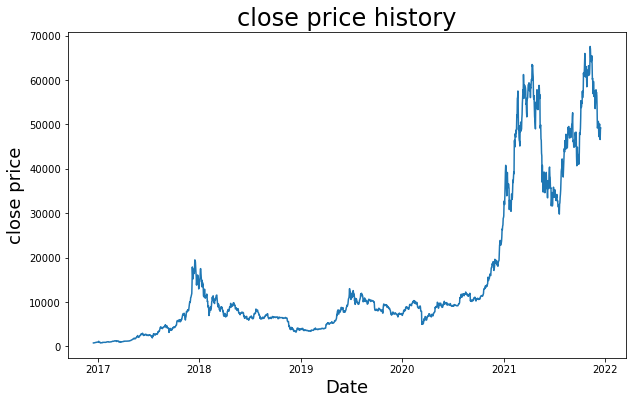

In [103]:
# Visualize the closing price history
plt.figure(figsize=(10,6))
plt.title('close price history',fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.show()

<ipython-input-104-b116c395ed29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


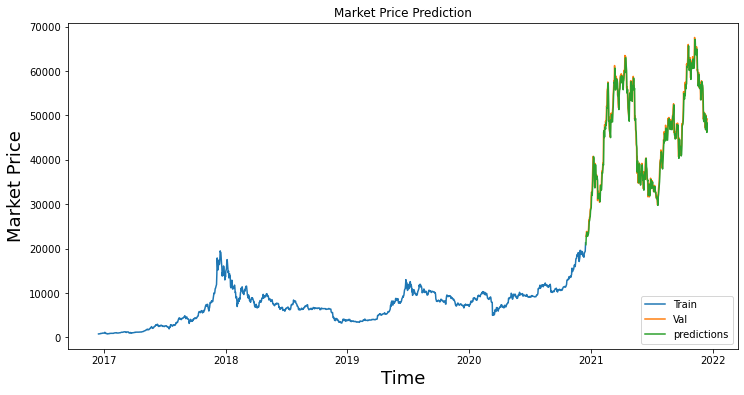

In [104]:
train = data[:n]
valid = data[n:]
valid['predictions'] = predictions 
plt.figure(figsize=(12,6))
plt.title('Market Price Prediction')
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Market Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc = 'lower right')
plt.show()


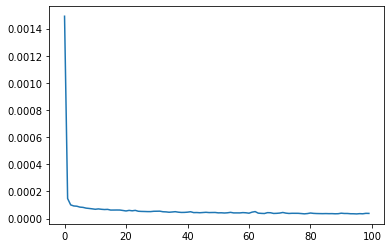

In [105]:
# plot loss 
plt.plot(history.history['loss'])
plt.show()

In [106]:
valid

,Close,predictions
Date,,
2020-12-17,22805.162109,20900.654297
2020-12-18,23137.960938,22513.736328
2020-12-19,23869.832031,23075.175781
2020-12-20,23477.294922,23710.335938
2020-12-21,22803.082031,23443.859375
...,...,...
2021-12-12,50098.335938,48748.316406
2021-12-13,46737.480469,49834.820312
2021-12-14,46612.632812,46866.308594


## Tomorrow's predicted price

In [107]:
new_stock = yf.Ticker("BTC-USD")
new_hist = new_stock.history(period="5y")

new_df=new_hist
hist.tail(10)

new_df2 = new_df.filter(['Close'])

last_30_days = new_df2[-d:].values

last_30_days_scaled = sc.transform(last_30_days)

x_test = []

x_test.append(last_30_days_scaled)

x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predictions_price = model.predict(x_test)

predictions_price = sc.inverse_transform(predictions_price)

print(predictions_price)

[[48949.703]]


In [108]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-12-16,778.963013,785.031982,778.963013,784.906982,83608200,0,0
2016-12-17,785.166016,792.508972,784.864014,790.828979,78989800,0,0
2016-12-18,791.007996,794.737000,788.026001,790.530029,60524400,0,0
2016-12-19,790.692017,793.611023,790.320007,792.713989,74886400,0,0
2016-12-20,792.247009,801.336975,791.497009,800.875977,99629296,0,0
...,...,...,...,...,...,...,...
2021-12-12,49354.855469,50724.867188,48725.851562,50098.335938,21939223599,0,0
2021-12-13,50114.742188,50205.000000,45894.847656,46737.480469,32166727776,0,0
2021-12-14,46709.824219,48431.398438,46424.496094,46612.632812,34638619079,0,0
